In [255]:
import numpy as np
import pandas as pd
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Embedding,Bidirectional,LSTM,Dense,Conv1D,Flatten,Dropout,GlobalMaxPooling1D,GlobalAveragePooling1D,MaxPooling1D
from keras.optimizers import Adam

In [8]:
train_csv = pd.read_csv('train_E52nqFa/train.csv')
test_csv = pd.read_csv('test_BppAoe0/test.csv')

In [9]:
train_csv.head()

,review_id,title,year,user_review,user_suggestion
0,1,Spooky's Jump Scare Mansion,2016.0,I'm scared and hearing creepy voices. So I'll...,1
1,2,Spooky's Jump Scare Mansion,2016.0,"Best game, more better than Sam Pepper's YouTu...",1
2,3,Spooky's Jump Scare Mansion,2016.0,"A littly iffy on the controls, but once you kn...",1
3,4,Spooky's Jump Scare Mansion,2015.0,"Great game, fun and colorful and all that.A si...",1
4,5,Spooky's Jump Scare Mansion,2015.0,Not many games have the cute tag right next to...,1


In [10]:
train_reviews = train_csv['user_review']

In [11]:
train_reviews = train_reviews.to_list()

In [12]:
type(train_reviews)

list

In [302]:
oov_tok = '<OOV>'
embedding_dim = 64
trunc_type = 'post'
padding_type = 'pre'
max_length = 1000
vocab_size = len(token.word_index)

In [303]:
token = Tokenizer(num_words = 50000,oov_token = oov_tok )

In [304]:
token.fit_on_texts(train_reviews)

In [305]:
train_sequences= token.texts_to_sequences(train_reviews)


In [306]:
m = max(len(a) for a in train_sequences)

In [307]:
padded = pad_sequences(train_sequences,padding = padding_type,truncating = trunc_type,maxlen= max_length)

In [308]:
padded.shape

(17494, 1000)

In [309]:
train_labels = train_csv['user_suggestion']

In [310]:
train_labels.shape

(17494,)

In [222]:
train_labels = train_labels.to_numpy()

In [79]:
type(train_labels)

numpy.ndarray

In [223]:
Model = Sequential([
    Embedding(vocab_size,embedding_dim,input_length = max_length),
    GlobalAveragePooling1D(),
    Dense(16,activation = 'relu'),
    Dense(1, activation = 'sigmoid')   
])

In [224]:
Model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_8 (Embedding)      (None, 1600, 64)          3782528   
_________________________________________________________________
global_average_pooling1d_4 ( (None, 64)                0         
_________________________________________________________________
dense_17 (Dense)             (None, 16)                1040      
_________________________________________________________________
dense_18 (Dense)             (None, 1)                 17        
Total params: 3,783,585
Trainable params: 3,783,585
Non-trainable params: 0
_________________________________________________________________


In [225]:
adam = Adam(lr = 0.01)

In [226]:
Model.compile(loss = 'binary_crossentropy',optimizer = adam, metrics = ['accuracy'])

In [227]:
history = Model.fit(padded,train_labels,epochs = 10,verbose = 1)

Epoch 1/10
17494/17494 [==============================] - 60s 3ms/step - loss: 0.5445 - accuracy: 0.7036
Epoch 2/10
17494/17494 [==============================] - 60s 3ms/step - loss: 0.3199 - accuracy: 0.8621
Epoch 3/10
17494/17494 [==============================] - 60s 3ms/step - loss: 0.2457 - accuracy: 0.8987
Epoch 4/10
17494/17494 [==============================] - 60s 3ms/step - loss: 0.2128 - accuracy: 0.9152
Epoch 5/10
17494/17494 [==============================] - 62s 4ms/step - loss: 0.1580 - accuracy: 0.9408
Epoch 6/10
17494/17494 [==============================] - 61s 3ms/step - loss: 0.1374 - accuracy: 0.9463
Epoch 7/10
17494/17494 [==============================] - 60s 3ms/step - loss: 0.1286 - accuracy: 0.9513
Epoch 8/10
17494/17494 [==============================] - 60s 3ms/step - loss: 0.1025 - accuracy: 0.9606
Epoch 9/10
17494/17494 [==============================] - 61s 3ms/step - loss: 0.0989 - accuracy: 0.9640
Epoch 10/10
17494/17494 [==============================

In [100]:
from matplotlib import pyplot as plt

In [101]:
def plot(history,string):
    plt.plot(history.history[string])
    plt.xlabel("epochs")
    plt.ylabel(string)
    plt.show()

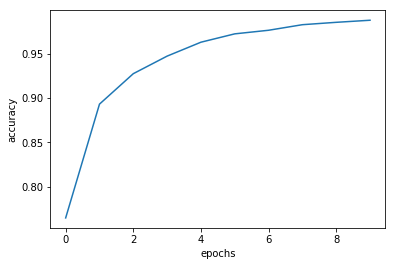

In [102]:
plot(history,'accuracy')

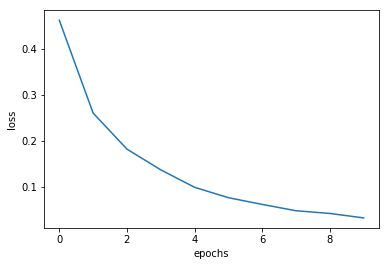

In [103]:
plot(history,'loss')

In [110]:
test_csv.head()

,review_id,title,year,user_review
0,1603,Counter-Strike: Global Offensive,2015.0,"Nice graphics, new maps, weapons and models. B..."
1,1604,Counter-Strike: Global Offensive,2018.0,I would not recommend getting into this at its...
2,1605,Counter-Strike: Global Offensive,2018.0,Edit 11/12/18I have tried playing CS:GO recent...
3,1606,Counter-Strike: Global Offensive,2015.0,The game is great. But the community is the wo...
4,1607,Counter-Strike: Global Offensive,2015.0,I thank TrulyRazor for buying this for me a lo...


In [311]:
test_review = test_csv['user_review']

In [312]:
test_review = test_review.to_list()

In [313]:
test_sequences = token.texts_to_sequences(test_review)

In [314]:
test_padded = pad_sequences(test_sequences,padding = padding_type,truncating = trunc_type,maxlen= max_length)

In [152]:
temp = Model.predict(test_padded)

In [153]:
Predictions=[]

In [154]:
for i in temp:
    if i >=0.45:
        Predictions.append(1)
    else:
        Predictions.append(0)

In [156]:
print(Predictions[0:100])

[0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0]


In [162]:
ID = test_csv['review_id']

In [163]:
ID.shape

(8045,)

In [164]:
Predictions = np.array(Predictions)

In [165]:
Predictions.shape

(8045,)

In [166]:
Sub = pd.DataFrame({'review_id':ID,'user_suggestion':Predictions})

In [167]:
Sub.head()

,review_id,user_suggestion
0,1603,0
1,1604,0
2,1605,0
3,1606,0
4,1607,1


In [168]:
Sub.to_csv('Submission1.csv',index=False)

### BASIC SUBMISSION GAVE A SCORE OF 0.813

#### For Imporving Performance:
<br/>
Now Creating a Validation Set <br/>
Using LSTMs and Bidirectional <br/>
Tweaking Hyper Parameters <br/>
Using the Overview.csv <br/>
Changing the Optimizer Parameters

In [199]:
train_size = 14000
embedding_dim = 16

In [200]:
train_padded = padded[:train_size]
labels_train = train_labels[:train_size]
validate_padded = padded[train_size:]
labels_validate = train_labels[train_size:]

In [182]:
Model2 = Sequential([
    Embedding(vocab_size,embedding_dim,input_length = max_length),
    Bidirectional(LSTM(32)),
    Dense(32,activation = 'relu'),
    Dense(8,activation = 'relu'),
    Dense(1, activation = 'sigmoid')   
])

In [183]:
Model2.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_5 (Embedding)      (None, 500, 16)           945632    
_________________________________________________________________
bidirectional_2 (Bidirection (None, 64)                12544     
_________________________________________________________________
dense_10 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_11 (Dense)             (None, 8)                 264       
_________________________________________________________________
dense_12 (Dense)             (None, 1)                 9         
Total params: 960,529
Trainable params: 960,529
Non-trainable params: 0
_________________________________________________________________


In [184]:
adam = Adam(lr = 0.005)

In [185]:
Model2.compile(loss = 'binary_crossentropy',optimizer = adam,metrics = ['accuracy'])

In [186]:
history2 = Model2.fit(train_padded,labels_train,epochs = 10, validation_data=(validate_padded,labels_validate))

C:\Users\SHALIN\Anaconda3\lib\site-packages\tensorflow\python\framework\indexed_slices.py:414: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 10000 samples, validate on 7494 samples
Epoch 1/10
10000/10000 [==============================] - 178s 18ms/step - loss: 0.5182 - accuracy: 0.7467 - val_loss: 0.5173 - val_accuracy: 0.7474
Epoch 2/10
10000/10000 [==============================] - 177s 18ms/step - loss: 0.2997 - accuracy: 0.8816 - val_loss: 0.4785 - val_accuracy: 0.7828
Epoch 3/10
10000/10000 [==============================] - 177s 18ms/step - loss: 0.1705 - accuracy: 0.9381 - val_loss: 0.6039 - val_accuracy: 0.7750
Epoch 4/10
10000/10000 [==============================] - 178s 18ms/step - loss: 0.0976 - accuracy: 0.9664 - val_loss: 0.6213 - val_accuracy: 0.7854
Epoch 5/10
10000/10000 [==============================] - 176s 18ms/step - loss: 0.0864 - accuracy: 0.9700 - val_loss: 1.1922 - val_accuracy: 0.7076
Epoch 6/10
10000/10000 [==============================] - 178s 18ms/step - loss: 0.0675 - accuracy: 0.9778 - val_loss: 0.7826 - val_accuracy: 0.7756
Epoch 7/10
10000/10000 [==============================] -

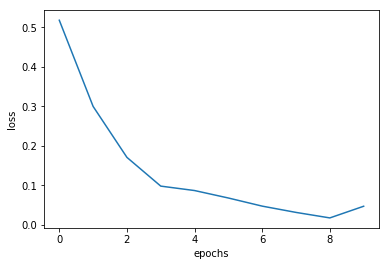

In [190]:
plot(history2,'loss')

In [191]:
temp2 = Model2.predict(test_padded)

In [193]:
Predictions2 = []

In [194]:
for i in temp2:
    if i >=0.5:
        Predictions2.append(1)
    else:
        Predictions2.append(0)

In [195]:
Sub2 = pd.DataFrame({'review_id':ID,'user_suggestion':Predictions2})

In [196]:
Sub2.to_csv('Submission2.csv',index=False)

In [206]:
Model3 = Sequential([
    Embedding(vocab_size,50,input_length = max_length),
    LSTM(64),
    Dense(256,activation='relu'),
    Dropout(0.5),
    Dense(1,activation = 'sigmoid')
])

In [207]:
Model3.compile(loss='binary_crossentropy',optimizer = Adam(lr=0.01),metrics=['accuracy'])

In [208]:
history3 = Model3.fit(train_padded,labels_train,epochs = 10, validation_data=(validate_padded,labels_validate))

C:\Users\SHALIN\Anaconda3\lib\site-packages\tensorflow\python\framework\indexed_slices.py:414: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 14000 samples, validate on 3494 samples
Epoch 1/10
14000/14000 [==============================] - 248s 18ms/step - loss: 0.5638 - accuracy: 0.7130 - val_loss: 0.5794 - val_accuracy: 0.7132
Epoch 2/10
14000/14000 [==============================] - 253s 18ms/step - loss: 0.2884 - accuracy: 0.8884 - val_loss: 0.5417 - val_accuracy: 0.7596
Epoch 3/10
14000/14000 [==============================] - 252s 18ms/step - loss: 0.1392 - accuracy: 0.9497 - val_loss: 0.6010 - val_accuracy: 0.7936
Epoch 4/10
14000/14000 [==============================] - 275s 20ms/step - loss: 0.0796 - accuracy: 0.9730 - val_loss: 0.6777 - val_accuracy: 0.7922
Epoch 5/10
14000/14000 [==============================] - 292s 21ms/step - loss: 0.0551 - accuracy: 0.9819 - val_loss: 0.8276 - val_accuracy: 0.8017
Epoch 6/10
14000/14000 [==============================] - 305s 22ms/step - loss: 0.0328 - accuracy: 0.9904 - val_loss: 1.2958 - val_accuracy: 0.7839
Epoch 7/10
14000/14000 [==============================] -

model4 = Sequential()
model4.add(Embedding(vocab_size,64,input_length=max_length))
model4.add(Conv1D(64, 5, activation='relu'))
model4.add(MaxPooling1D(5))
model4.add(Flatten())
model4.add(Dense(units=64, activation='relu'))
model4.add(Dense(units=1, activation='sigmoid'))

In [209]:
temp3 = Model2.predict(test_padded)

In [210]:
Predictions3 = []

In [211]:
for i in temp3:
    if i >=0.45:
        Predictions3.append(1)
    else:
        Predictions3.append(0)

In [212]:
Sub3 = pd.DataFrame({'review_id':ID,'user_suggestion':Predictions3})

In [213]:
Sub3.to_csv('Submission3.csv',index=False)

In [232]:
temp4 = Model.predict(test_padded)

In [233]:
Predictions4=[]
for i in temp:
    if i >=0.45:
        Predictions4.append(1)
    else:
        Predictions4.append(0)

In [234]:
Sub4 = pd.DataFrame({'review_id':ID,'user_suggestion':Predictions4})

In [236]:
Sub4.to_csv('Submission4.csv',index=False)

In [250]:
Model5= Sequential([
    Embedding(vocab_size,64,input_length = max_length),
    Conv1D(64, 5, activation='relu'),
    MaxPooling1D(5),
    GlobalAveragePooling1D(),
    Dense(units=16, activation='relu'),
    Dense(units=1, activation='sigmoid')  
])

In [251]:
Model5.compile(loss='binary_crossentropy',optimizer = Adam(lr=0.01),metrics=['accuracy'])
history5=Model5.fit(padded,train_labels,epochs = 5)
temp5 = Model5.predict(test_padded)
Predictions5 = []
for i in temp5:
    if i >=0.40:
        Predictions5.append(1)
    else:
        Predictions5.append(0)
Sub5 = pd.DataFrame({'review_id':ID,'user_suggestion':Predictions5})
Sub5.to_csv('Submission5.csv',index=False)

C:\Users\SHALIN\Anaconda3\lib\site-packages\tensorflow\python\framework\indexed_slices.py:414: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Epoch 1/5
17494/17494 [==============================] - 100s 6ms/step - loss: 0.4164 - accuracy: 0.8085
Epoch 2/5
17494/17494 [==============================] - 104s 6ms/step - loss: 0.2096 - accuracy: 0.9168
Epoch 3/5
17494/17494 [==============================] - 101s 6ms/step - loss: 0.1067 - accuracy: 0.9615
Epoch 4/5
17494/17494 [==============================] - 101s 6ms/step - loss: 0.0554 - accuracy: 0.9811
Epoch 5/5
17494/17494 [==============================] - 102s 6ms/step - loss: 0.0733 - accuracy: 0.9877


In [263]:
Predictions7=[]
for i in temp5:
    if i >=0.15:
        Predictions7.append(1)
    else:
        Predictions7.append(0)
Sub7 = pd.DataFrame({'review_id':ID,'user_suggestion':Predictions7})
Sub7.to_csv('Submission12.csv',index=False)

In [264]:
Model6= Sequential([
    Embedding(vocab_size,128,input_length = max_length),
    GlobalMaxPooling1D(),
    Dense(units=6, activation='relu'),
    Dense(units=1, activation='sigmoid')  
])

In [265]:
Model6.summary()

Model: "sequential_17"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_17 (Embedding)     (None, 1600, 128)         7565056   
_________________________________________________________________
global_max_pooling1d_3 (Glob (None, 128)               0         
_________________________________________________________________
dense_34 (Dense)             (None, 6)                 774       
_________________________________________________________________
dense_35 (Dense)             (None, 1)                 7         
Total params: 7,565,837
Trainable params: 7,565,837
Non-trainable params: 0
_________________________________________________________________


In [266]:
Model6.compile(loss='binary_crossentropy',optimizer = Adam(lr=0.02),metrics=['accuracy'])
history6=Model6.fit(padded,train_labels,epochs = 5)
temp6 = Model6.predict(test_padded)
Predictions8 = []
for i in temp6:
    if i >=0.10:
        Predictions8.append(1)
    else:
        Predictions8.append(0)
Sub8 = pd.DataFrame({'review_id':ID,'user_suggestion':Predictions8})
Sub8.to_csv('Submission12.csv',index=False)

Epoch 1/5
17494/17494 [==============================] - 117s 7ms/step - loss: 0.4383 - accuracy: 0.7958
Epoch 2/5
17494/17494 [==============================] - 116s 7ms/step - loss: 0.2881 - accuracy: 0.8820
Epoch 3/5
17494/17494 [==============================] - 112s 6ms/step - loss: 0.1938 - accuracy: 0.9279
Epoch 4/5
17494/17494 [==============================] - 112s 6ms/step - loss: 0.1277 - accuracy: 0.9570
Epoch 5/5
17494/17494 [==============================] - 115s 7ms/step - loss: 0.0859 - accuracy: 0.9740


In [262]:
Predictions8 = []
for i in temp6:
    if i >=0.10:
        Predictions8.append(1)
    else:
        Predictions8.append(0)
Sub8 = pd.DataFrame({'review_id':ID,'user_suggestion':Predictions8})
Sub8.to_csv('Submission10.csv',index=False)

### Sklearn

In [267]:
from sklearn.naive_bayes import MultinomialNB
#clf = MultinomialNB().fit(X_train_tfidf, twenty_train.target

In [268]:
Modelsk = MultinomialNB().fit(padded,train_labels)

In [269]:
Predictions_sk = Modelsk.predict(test_padded)

In [272]:
Sub_sk = pd.DataFrame({'review_id':ID,'user_suggestion':Predictions_sk})
Sub_sk.to_csv('Submission13.csv',index=False)

In [273]:
from sklearn.linear_model import SGDClassifier

In [285]:
Model_sk2 = SGDClassifier()

In [286]:
Model_sk2.fit(padded,train_labels)

C:\Users\SHALIN\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


SGDClassifier(alpha=0.0001, average=False, class_weight=None,
       early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
       l1_ratio=0.15, learning_rate='optimal', loss='hinge', max_iter=None,
       n_iter=None, n_iter_no_change=5, n_jobs=None, penalty='l2',
       power_t=0.5, random_state=None, shuffle=True, tol=None,
       validation_fraction=0.1, verbose=0, warm_start=False)

In [287]:
prediction_sk2 = Model_sk2.predict(test_padded)

In [288]:
Sub_sk2 = pd.DataFrame({'review_id':ID,'user_suggestion':prediction_sk2})
Sub_sk2.to_csv('Submission14.csv',index=False)

Using Overview <br/>
RNNs, GRU and a better model <br/>
Manipulation of Data (i.e) removing useless Words,etc

In [335]:
from keras.layers import Activation
max_features = vocab_size
maxlen = 1000
embedding_size = 32

# Convolution
kernel_size = 5
filters = 64
pool_size = 4

# LSTM
lstm_output_size = 70

# Training
batch_size = 240
epochs = 4



model = Sequential()
model.add(Embedding(max_features, embedding_size, input_length=maxlen))
model.add(Dropout(0.25))
model.add(Conv1D(filters,
                 kernel_size,
                 padding='valid',
                 activation='relu',
                 strides=1))
model.add(MaxPooling1D(pool_size=pool_size))
model.add(LSTM(lstm_output_size))
model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer=Adam(lr=0.02),
              metrics=['accuracy'])


history_keras = model.fit(padded,train_labels,batch_size=batch_size,epochs=epochs)
       


C:\Users\SHALIN\Anaconda3\lib\site-packages\tensorflow\python\framework\indexed_slices.py:414: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Epoch 1/4
17494/17494 [==============================] - 123s 7ms/step - loss: 0.4956 - accuracy: 0.7477
Epoch 2/4
17494/17494 [==============================] - 122s 7ms/step - loss: 0.2829 - accuracy: 0.8860
Epoch 3/4
17494/17494 [==============================] - 123s 7ms/step - loss: 0.1916 - accuracy: 0.9283
Epoch 4/4
17494/17494 [==============================] - 125s 7ms/step - loss: 0.1269 - accuracy: 0.9548


In [296]:
preds = preds.reshape([8045,])

In [341]:
Sub_mod = pd.DataFrame({'review_id':ID,'user_suggestion':Predictions16})
Sub_mod.to_csv('Submission20.csv',index=False)

In [323]:
preds

array([0.00177565, 0.00391188, 0.00389832, ..., 0.0065721 , 0.999845  ,
       0.73922795], dtype=float32)

In [340]:
Predictions16 = []
for i in prd:
    if i >=0.10:
        Predictions16.append(1)
    else:
        Predictions16.append(0)

In [336]:
prd = model.predict(test_padded)

In [332]:
prd

array([[0.08329499],
       [0.0497365 ],
       [0.10200366],
       ...,
       [0.0428478 ],
       [0.8899849 ],
       [0.52172697]], dtype=float32)

In [337]:
prd

array([[0.00836769],
       [0.00635457],
       [0.01598555],
       ...,
       [0.05394843],
       [0.9968214 ],
       [0.9865307 ]], dtype=float32)

In [329]:
Predictions16

[0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 0,


In [330]:
model.fit(padded,train_labels,batch_size=batch_size,epochs=1)

Epoch 1/1
17494/17494 [==============================] - 500s 29ms/step - loss: 0.3189 - accuracy: 0.8686


In [343]:
test2 = pd.read_csv('./test_BppAoe0/test.csv')

In [369]:
check = test2['user_suggestion'][:5008]

In [381]:
check_train = test2['user_suggestion'][5008:]
#check_train = check_train.to_numpy()
#check = check.to_numpy()

In [352]:
token_check = Tokenizer(oov_token=oov_tok)

In [362]:
check_train_sentences = test2['user_review'][5008:]

In [363]:
check_train_sentences=check_train_sentences.to_list()

In [364]:
token_check.fit_on_texts(check_train_sentences)

In [365]:
check_train_sequences = token_check.texts_to_sequences(check_train_sentences)

In [366]:
check_train_pad = pad_sequences(check_train_sequences,truncating = 'post',padding ='post',maxlen=1400)

In [367]:
check_train_pad.shape

(3037, 1400)

In [373]:
check_sentences = test2['user_review'][:5008]

In [378]:
#check_sentences=check_sentences.to_list()
len(token_check.word_index)

36752

In [375]:
check_sequences = token_check.texts_to_sequences(check_sentences)

In [376]:
check_pad = pad_sequences(check_sequences,truncating = 'post',padding ='post',maxlen=1400)

In [382]:
max_features = 36752
maxlen = 1400
embedding_size = 64

# Convolution
kernel_size = 5
filters = 64
pool_size = 4

# LSTM
lstm_output_size = 70

# Training
batch_size = 240
epochs = 4



model = Sequential()
model.add(Embedding(max_features, embedding_size, input_length=maxlen))
model.add(Dropout(0.25))
model.add(Conv1D(filters,
                 kernel_size,
                 padding='valid',
                 activation='relu',
                 strides=1))
model.add(MaxPooling1D(pool_size=pool_size))
model.add(LSTM(lstm_output_size))
model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer=Adam(lr=0.02),
              metrics=['accuracy'])


history_keras = model.fit(check_train_pad,check_train,batch_size=batch_size,epochs=epochs,validation_data=(check_pad,check))
       

C:\Users\SHALIN\Anaconda3\lib\site-packages\tensorflow\python\framework\indexed_slices.py:414: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 3037 samples, validate on 5008 samples
Epoch 1/4
1680/3037 [===============>..............] - ETA: 28s - loss: 0.1067 - accuracy: 0.8738

InvalidArgumentError:  indices[41,63] = 36752 is not in [0, 36752)
	 [[node embedding_27/embedding_lookup (defined at C:\Users\SHALIN\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:3009) ]] [Op:__inference_keras_scratch_graph_363755]

Function call stack:
keras_scratch_graph
